# 분류 알고리즘
---
**분류**(classification): 개별 클래스 레이블이 있는 지도 학습
- **이진 분류**(binary classification): 두 개의 클래스 사이를 구분하는 경우<br>
(예)스팸 이메일 감지: 스팸 또는 스팸이 아닌 이메일
- **다중 분류**(multiclass classification): 두 개 이상의 클래스 레이블을 가진 경우<br>
(예)손 글자 인식: 0부터 9까지 숫자

**데이터셋**
- 샘플(인스턴스, 관측): 특성 행렬 X에 있는 행
- 특성(속성, 측정값, 차원): 특성 행렬 X에 있는 열
- 클래스 레이블(타깃)

# KNN(K-Nearest Neighbor, K-최근접 이웃)
---
**KNN 알고리즘** [sklearn KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
1. 숫자 $k$와 거리 측정 기준을 선택함
2. 분류하려는 샘플에서 $k$개의 최근접 이웃을 찾음
3. 다수결 투표를 통해 클래스 레이블을 할당함

**게으른 학습기**(lazy learner): 알고리즘은 훈련 데이터에서 판별 함수를 학습하는 대신 훈련 데이터셋을 메모리에 저장함

**장점**: 메모리 기반 방식의 분류기는 수집된 새로운 훈련 데이터에 즉시 적응할 수 있음

**단점**: 새로운 샘플을 분류하는 계산 복잡도, 훈련 단계가 없기 때문에 훈련 샘플을 버릴 수 없음, 대규모 데이터셋에서 작업한다면 저장 공간에 문제가 생김

# 이진 분류(Binary classification) 실습
---
**데이터셋**: iris(붓꽃 데이터셋)
- Iris-setosa, Iris-versicolor, Iris-virginica 세 종류 150개의 붓꽃 샘플

**이진 분류**(Binary classification)

**KNN**(K-Nearest Neighbor, K-최근접 이웃)

### 필요한 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 준비

In [ ]:
# !gdown https://raw.githubusercontent.com/devdio/datasets/main/iris.csv

Downloading...
From: https://raw.githubusercontent.com/devdio/datasets/main/iris.csv
To: /content/iris.csv
5.11kB [00:00, 3.91MB/s]       


In [ ]:
# 데이터 읽기
iris = pd.read_csv('iris.csv')
iris.shape

(150, 6)

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Id컬럼 제거하기
df = iris.drop(['Id'], axis=1).copy()
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# 컬럼명 확인하기
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
# 컬럼명 변경하기
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Species컬럼의 고유한 값의 개수
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [ ]:
# 범주형 데이터를 수치형으로 변환하기(알파벳 순서대로 LabelEncoder)
df['species'] = df['species'].map({
    'Iris-setosa': 0, 
    'Iris-versicolor': 1, 
    'Iris-virginica': 2
})

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# # X, y 분리하기(방법-1)
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]

# X.shape, y.shape

In [ ]:
# X, y 분리하기(방법-2)
X = df.drop(['species'], axis=1)
y = df['species']

X.shape, y.shape

((150, 4), (150,))

### 데이터 분리(train, test)

In [ ]:
from sklearn.utils import shuffle

X, y = shuffle(X, y)

num = int(len(X)*0.8)
X_train = X.iloc[:num,]
X_test = X.iloc[num:,]
y_train = y.iloc[:num,]
y_test = y.iloc[num:,]

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


### 표준화(Standardization)
- 평균이 0, 분산이 1인 가우시안 정규분포<br>
$Z=\frac{X-μ}{σ}$

In [ ]:
X_train = X_train.copy()
X_test = X_test.copy()

for col in X_train.columns:
    mu = X_train[col].mean() # train의 평균
    std = X_train[col].std() # train의 표준편차
    X_train[col] = (X_train[col] - mu) / std
    X_test[col] = (X_test[col] - mu) / std # test는 train의 평균과 표준편차를 사용하여 정규화

In [ ]:
type(X_train), type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
X_train = X_train.values
y_train = y_train.values

### 데이터 전처리 함수
- **이진 데이터 준비**

In [ ]:
def get_iris(mode=None):
    # 데이터 읽기
    iris = pd.read_csv('iris.csv')

    # 불필요한 컬럼 제거하기
    df = iris.drop(['Id'], axis=1).copy()

    # 컬럼명 변경하기
    df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

    # 이진 데이터
    if (mode == 'bin'):
        df = df.loc[df['species'] != 'Iris-virginica']

    # LabelEncoder
    df['species'] = df['species'].map({
        'Iris-setosa': 0, 
        'Iris-versicolor': 1, 
        'Iris-virginica': 2
        })

    # X, y 분리하기
    X = df.drop(['species'], axis=1)
    y = df['species']

    # train, test 나누기
    X, y = shuffle(X, y)
    num = int(len(X)*0.8)
    X_train = X.iloc[:num,]
    X_test = X.iloc[num:,]
    y_train = y.iloc[:num,]
    y_test = y.iloc[num:,]
    
    # 정규화
    X_train = X_train.copy()
    X_test = X_test.copy()

    for col in X_train.columns:
        mu = X_train[col].mean() # train의 평균
        std = X_train[col].std() # train의 표준편차
        X_train[col] = (X_train[col] - mu) / std
        X_test[col] = (X_test[col] - mu) / std 

    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = get_iris(mode='bin')
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(80, 4) (20, 4)
(80,) (20,)


In [ ]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

### 학습

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

### 평가

In [ ]:
clf.score(X_train, y_train)

1.0

In [ ]:
clf.score(X_test, y_test)

1.0

### 예측

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])

- **성능 평가**

In [ ]:
(y_pred==y_test).sum()/len(y_test)

1.0

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_score(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)

    print('accuracy:', acc)
    print('precision:', pre)
    print('recall:', rec)

In [ ]:
print_score(y_test, y_pred)

accuracy: 1.0
precision: 1.0
recall: 1.0


- **혼동 행렬**(confusion matrix)

In [ ]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
cfm

array([[11,  0],
       [ 0,  9]])

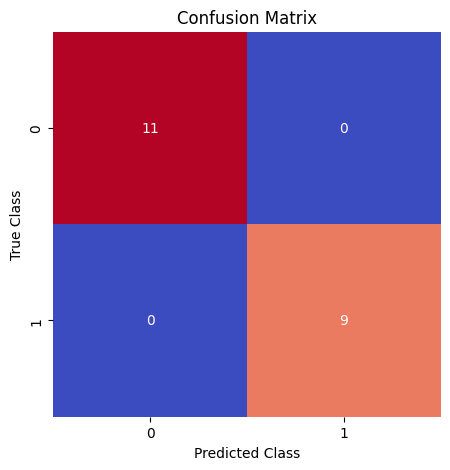

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(cfm, annot=True, cbar=False, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()